## Data preprocessing #1 - Dropping

In [1]:
%load_ext autoreload
%autoreload all

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# local modules
import sys
sys.path.append("..")

from _helpers import constants
from _helpers import drop
from _helpers import functions as hf

In [4]:
# load data
df_train = pd.read_csv(constants.TRAIN,sep=",")

In [5]:
# Create empty DF for storing user-session pairs to be deleted
deleted_user_session_pairs = pd.DataFrame(columns=['user_id', 'session_id'])
len_df_train = df_train.shape[0]

## Single-action users

These users are not suitable for learning

#### Number of actions of distinct users

Text(0.5, 1.0, 'Number of actions (N) of distinct user in the dataset')

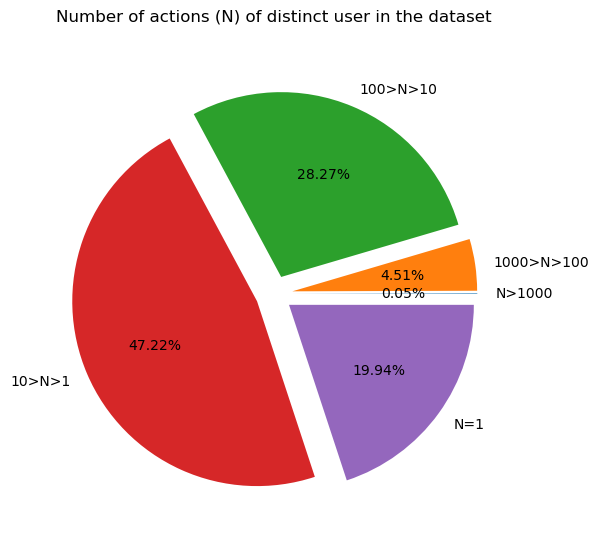

In [6]:
user_id_count = df_train.groupby('user_id').agg({'session_id':'first','user_id':'count'}).rename(columns={'user_id': 'count'}).reset_index()[['user_id','session_id','count']]

user_id_groups = pd.DataFrame({
    'type': [
        'N>1000',
        '1000>N>100',
        '100>N>10',
        '10>N>1',
        'N=1'
    ],
    'count': [
        user_id_count[user_id_count['count'] > 1000].count()[0],
        user_id_count[(user_id_count['count'] > 100) & (user_id_count['count'] < 1000)].count()[0],
        user_id_count[(user_id_count['count'] > 10) & (user_id_count['count'] < 100)].count()[0],
        user_id_count[(user_id_count['count'] > 1) & (user_id_count['count'] < 10)].count()[0],
        user_id_count[user_id_count['count'] == 1].count()[0]
    ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=user_id_groups['count'], labels = user_id_groups['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of actions (N) of distinct user in the dataset",pad=30)

In [7]:
dropped_result = drop.__remove_single_action_users(df_train)
deleted_user_session_pairs = drop.__update_user_session_pairs(deleted_user_session_pairs, dropped_result)
df_train = drop.__exclude_user_session_pairs(df_train, dropped_result)

Text(0.5, 1.0, 'Number of actions (N) of distinct user in the dataset')

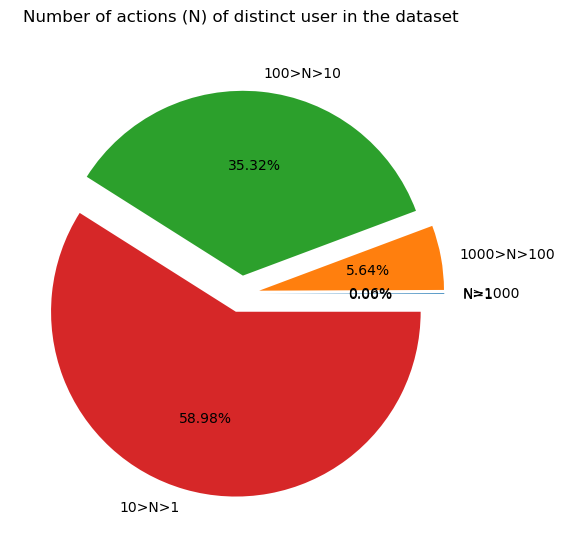

In [8]:
user_id_count = df_train.groupby('user_id').agg({'session_id':'first','user_id':'count'}).rename(columns={'user_id': 'count'}).reset_index()[['user_id','session_id','count']]

user_id_groups = pd.DataFrame({
    'type': [
        'N>1000',
        '1000>N>100',
        '100>N>10',
        '10>N>1',
        'N=1'
    ],
    'count': [
        user_id_count[user_id_count['count'] > 1000].count()[0],
        user_id_count[(user_id_count['count'] > 100) & (user_id_count['count'] < 1000)].count()[0],
        user_id_count[(user_id_count['count'] > 10) & (user_id_count['count'] < 100)].count()[0],
        user_id_count[(user_id_count['count'] > 1) & (user_id_count['count'] < 10)].count()[0],
        user_id_count[user_id_count['count'] == 1].count()[0]
    ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=user_id_groups['count'], labels = user_id_groups['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of actions (N) of distinct user in the dataset",pad=30)

### Single-step sessions and excessive-step sessions


Text(0.5, 1.0, 'Number of sessions (N) of distinct user in the dataset')

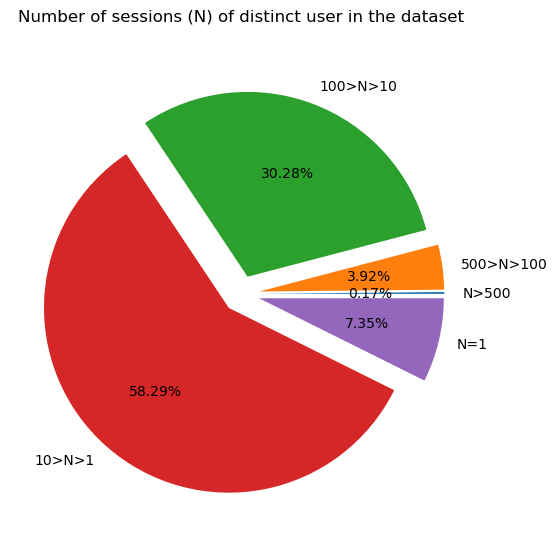

In [9]:
session_action_count = df_train.groupby('session_id').agg({'user_id':'first','session_id':'count'}).rename(columns={'session_id': 'count'}).reset_index()[['user_id','session_id','count']]

session_action_count = pd.DataFrame({
     'type': [
            'N>500',
            '500>N>100',
            '100>N>10',
            '10>N>1',
            'N=1'
        ],
        'count': [
            session_action_count[session_action_count['count'] > 500].count()[0],
            session_action_count[(session_action_count['count'] > 100) & (session_action_count['count'] < 500)].count()[0],
            session_action_count[(session_action_count['count'] > 10) & (session_action_count['count'] < 100)].count()[0],
            session_action_count[(session_action_count['count'] > 1) & (session_action_count['count'] < 10)].count()[0],
            session_action_count[session_action_count['count'] == 1].count()[0]
        ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=session_action_count['count'], labels = session_action_count['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of sessions (N) of distinct user in the dataset",pad=30)

In [10]:
dropped_result = drop.__remove_single_action_sessions(df_train)
deleted_user_session_pairs = drop.__update_user_session_pairs(deleted_user_session_pairs, dropped_result)
df_train = drop.__exclude_user_session_pairs(df_train, dropped_result)

Text(0.5, 1.0, 'Number of sessions (N) of distinct user in the dataset')

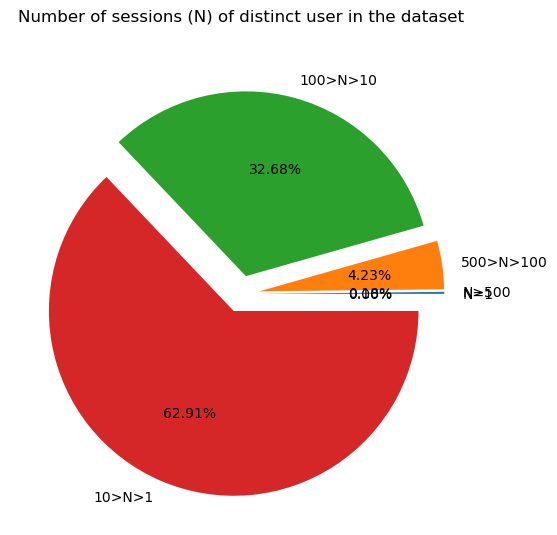

In [11]:
session_action_count = df_train.groupby('session_id').agg({'user_id':'first','session_id':'count'}).rename(columns={'session_id': 'count'}).reset_index()[['user_id','session_id','count']]

session_action_count = pd.DataFrame({
     'type': [
            'N>500',
            '500>N>100',
            '100>N>10',
            '10>N>1',
            'N=1'
        ],
        'count': [
            session_action_count[session_action_count['count'] > 500].count()[0],
            session_action_count[(session_action_count['count'] > 100) & (session_action_count['count'] < 500)].count()[0],
            session_action_count[(session_action_count['count'] > 10) & (session_action_count['count'] < 100)].count()[0],
            session_action_count[(session_action_count['count'] > 1) & (session_action_count['count'] < 10)].count()[0],
            session_action_count[session_action_count['count'] == 1].count()[0]
        ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=session_action_count['count'], labels = session_action_count['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of sessions (N) of distinct user in the dataset",pad=30)

In [12]:
dropped_result = drop.__remove_excessive_action_sessions(df_train,excessive_threshold=500)
deleted_user_session_pairs = drop.__update_user_session_pairs(deleted_user_session_pairs, dropped_result)
df_train = drop.__exclude_user_session_pairs(df_train, dropped_result)

Text(0.5, 1.0, 'Number of sessions (N) of distinct user in the dataset')

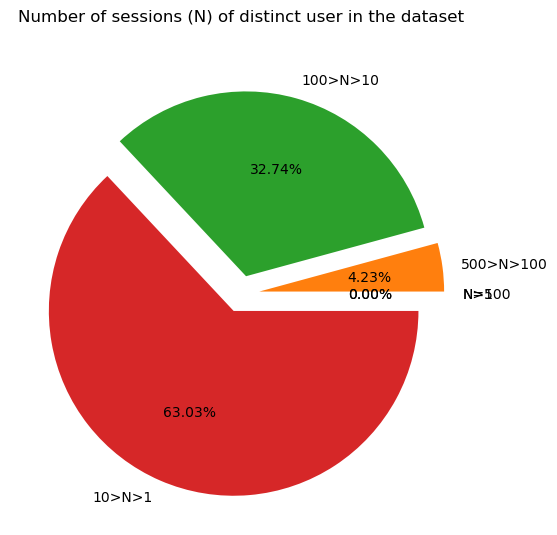

In [13]:
session_action_count = df_train.groupby('session_id').agg({'user_id':'first','session_id':'count'}).rename(columns={'session_id': 'count'}).reset_index()[['user_id','session_id','count']]

session_action_count = pd.DataFrame({
     'type': [
            'N>500',
            '500>N>100',
            '100>N>10',
            '10>N>1',
            'N=1'
        ],
        'count': [
            session_action_count[session_action_count['count'] > 500].count()[0],
            session_action_count[(session_action_count['count'] > 100) & (session_action_count['count'] < 500)].count()[0],
            session_action_count[(session_action_count['count'] > 10) & (session_action_count['count'] < 100)].count()[0],
            session_action_count[(session_action_count['count'] > 1) & (session_action_count['count'] < 10)].count()[0],
            session_action_count[session_action_count['count'] == 1].count()[0]
        ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=session_action_count['count'], labels = session_action_count['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of sessions (N) of distinct user in the dataset",pad=30)

## Sessions with duplicated session_id and step

We don't know which one of those actual sessions is correct, so we drop the whole duplicated session 

In [14]:
dropped_result = drop.__remove_sessions_with_dup_steps(df_train)
deleted_user_session_pairs = drop.__update_user_session_pairs(deleted_user_session_pairs, dropped_result)
df_train = drop.__exclude_user_session_pairs(df_train, dropped_result)

## Sessions with short average session step duration (possible bots)

#### Length of the sesssion (in minutes)

In [15]:
u_actions_per_session = df_train.groupby(['user_id','session_id'],as_index=False) \
.agg(
    steps=('step','count'),
    first_timestamp=('timestamp','first'),
    last_timestamp=('timestamp','last'),
    session_length=('timestamp', lambda x: (x.max()-x.min())),
)

def avg_step_duration(row):
    return row['session_length'] / row['steps']

def seconds_to_minutes(seconds):
    return round(seconds/60,2)

# transform session length into minutes
u_actions_per_session['session_length_minutes'] = u_actions_per_session['session_length'].apply(seconds_to_minutes);

# calculate avergate duration of step
u_actions_per_session['avg_step_duration_seconds'] = u_actions_per_session.apply(avg_step_duration,axis=1);

u_actions_per_session

,user_id,session_id,steps,first_timestamp,last_timestamp,session_length,session_length_minutes,avg_step_duration_seconds
0,0001VQMGUI65,466687f1875ee,18,1541075929,1541076413,484,8.07,26.888889
1,0003QTCX5MJX,6e81f1bdeb75d,4,1541441455,1541441472,17,0.28,4.250000
2,0004IOZI7CKF,0146f7cb014ba,5,1541266717,1541266868,151,2.52,30.200000
3,0004WCFRV3FB,b47e1ccca2b97,2,1541421780,1541421814,34,0.57,17.000000
4,0008BO33KUQ0,298103812b153,33,1541373167,1541373657,490,8.17,14.848485
...,...,...,...,...,...,...,...,...
711120,ZZZMUHLO5WBG,030e63555af39,2,1541231442,1541231811,369,6.15,184.500000
711121,ZZZOZKON2HVJ,ed00ff25dec95,3,1541164169,1541164296,127,2.12,42.333333
711122,ZZZPQ336U50Y,064c82a3bcbbd,12,1541252236,1541255539,3303,55.05,275.250000
711123,ZZZRFN2DZ2BV,2af5b0a2ba2f8,34,1541165368,1541167476,2108,35.13,62.000000


[Text(0.5, 1.0, 'Length of the session'), Text(0, 0.5, 'Time (min)')]

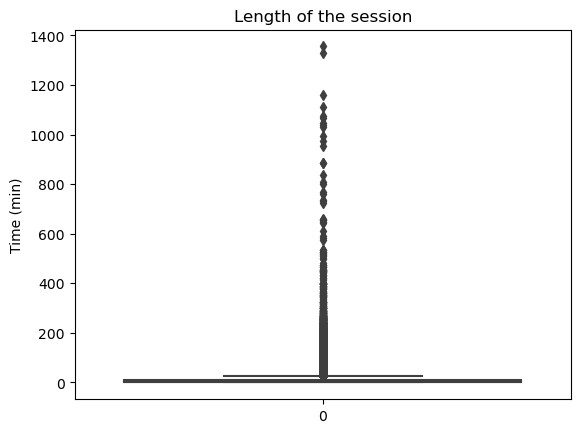

In [16]:
sns.boxplot(data=u_actions_per_session.session_length_minutes).set(title='Length of the session',ylabel="Time (min)")

Text(0.5, 1.0, 'Average time per session step in seconds')

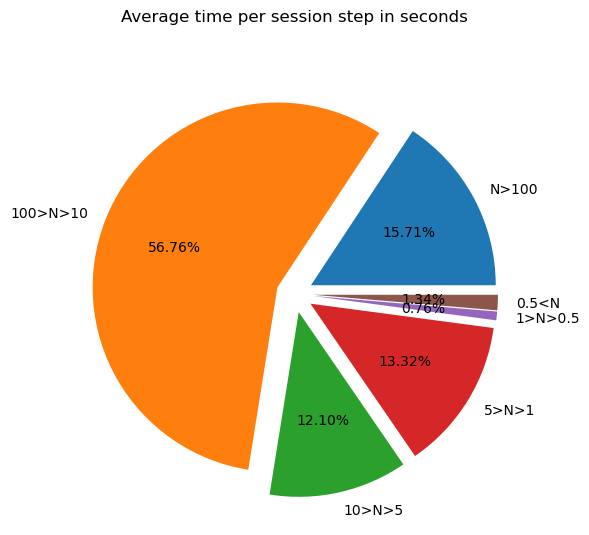

In [17]:
u_actions_per_session_groups = pd.DataFrame({
   'type': [
        'N>100',
        '100>N>10',
        '10>N>5',
        '5>N>1',
        '1>N>0.5',
        '0.5<N'
    ],
    'count': [
        u_actions_per_session[u_actions_per_session['avg_step_duration_seconds'] > 100].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 10) & (u_actions_per_session['avg_step_duration_seconds'] < 100)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 5) & (u_actions_per_session['avg_step_duration_seconds'] < 10)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 1) & (u_actions_per_session['avg_step_duration_seconds'] < 5)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 0.5) & (u_actions_per_session['avg_step_duration_seconds'] < 1)].count()[0],
        u_actions_per_session[u_actions_per_session['avg_step_duration_seconds'] < 0.5].count()[0]
    ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=u_actions_per_session_groups['count'], labels = u_actions_per_session_groups['type'], explode=[0.1]*6, autopct="%.2f%%")
plt.title("Average time per session step in seconds",pad=30)

In [18]:
dropped_result = drop.__remove_small_avg_step_duration_sessions(df_train,minimum_session_step_seconds=1)
deleted_user_session_pairs = drop.__update_user_session_pairs(deleted_user_session_pairs, dropped_result)
df_train = drop.__exclude_user_session_pairs(df_train, dropped_result)

Step is a attribute representing step order number in the sequence of actions within the session

In [19]:
u_actions_per_session = df_train.groupby(['user_id','session_id'],as_index=False) \
.agg(
    steps=('step','count'),
    first_timestamp=('timestamp','first'),
    last_timestamp=('timestamp','last'),
    session_length=('timestamp', lambda x: (x.max()-x.min())),
)

def avg_step_duration(row):
    return row['session_length'] / row['steps']

def seconds_to_minutes(seconds):
    return round(seconds/60,2)

# transform session length into minutes
u_actions_per_session['session_length_minutes'] = u_actions_per_session['session_length'].apply(seconds_to_minutes);

# calculate avergate duration of step
u_actions_per_session['avg_step_duration_seconds'] = u_actions_per_session.apply(avg_step_duration,axis=1);

[Text(0.5, 1.0, 'Length of the session'), Text(0, 0.5, 'Time (min)')]

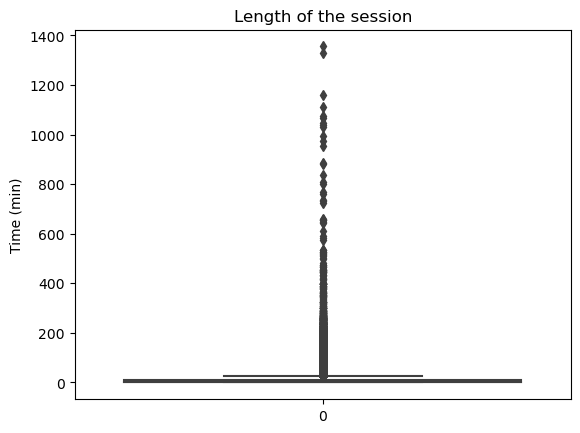

In [20]:
sns.boxplot(data=u_actions_per_session.session_length_minutes).set(title='Length of the session',ylabel="Time (min)")

Text(0.5, 1.0, 'Average time per session step in seconds')

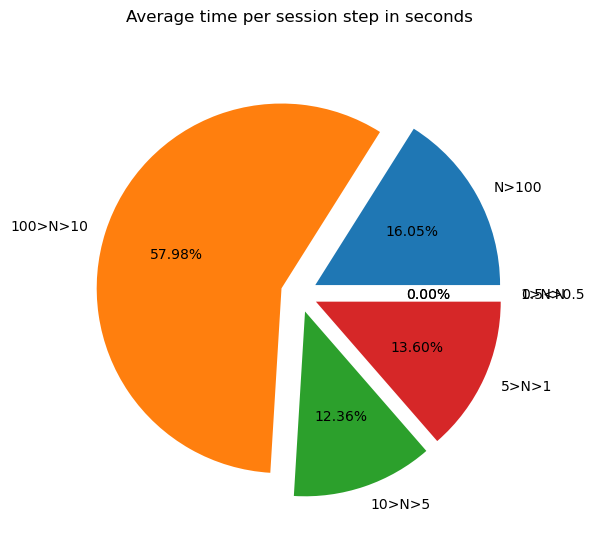

In [21]:
u_actions_per_session_groups = pd.DataFrame({
   'type': [
        'N>100',
        '100>N>10',
        '10>N>5',
        '5>N>1',
        '1>N>0.5',
        '0.5<N'
    ],
    'count': [
        u_actions_per_session[u_actions_per_session['avg_step_duration_seconds'] > 100].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 10) & (u_actions_per_session['avg_step_duration_seconds'] < 100)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 5) & (u_actions_per_session['avg_step_duration_seconds'] < 10)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 1) & (u_actions_per_session['avg_step_duration_seconds'] < 5)].count()[0],
        u_actions_per_session[(u_actions_per_session['avg_step_duration_seconds'] > 0.5) & (u_actions_per_session['avg_step_duration_seconds'] < 1)].count()[0],
        u_actions_per_session[u_actions_per_session['avg_step_duration_seconds'] < 0.5].count()[0]
    ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=u_actions_per_session_groups['count'], labels = u_actions_per_session_groups['type'], explode=[0.1]*6, autopct="%.2f%%")
plt.title("Average time per session step in seconds",pad=30)

#### Number of steps in distinct sessions

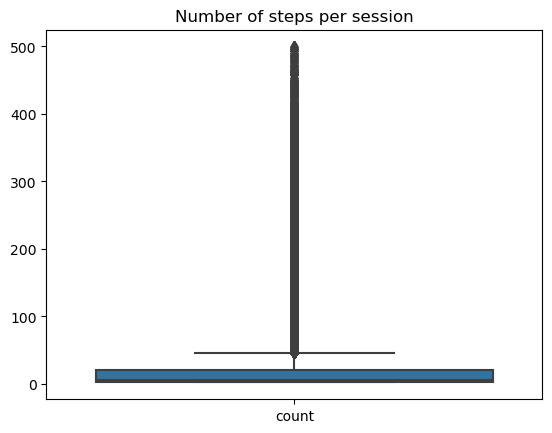

In [22]:
session_action_count = df_train.groupby(['session_id'])['step'].count().reset_index(name="count")
sns.boxplot(data=session_action_count).set(title="Number of steps per session");

In [23]:
session_action_count.describe()

,count
count,694511.000000
mean,21.110003
std,42.310588
min,2.000000
25%,3.000000
50%,6.000000
75%,20.000000
max,500.000000


Text(0.5, 1.0, 'Number of steps (N) of distinct sessions')

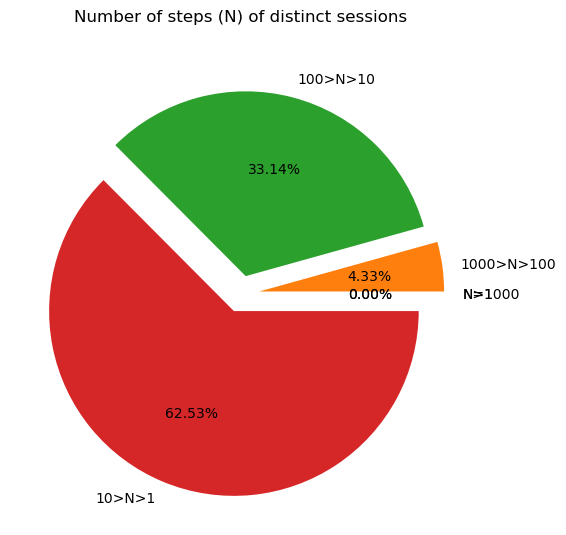

In [24]:
session_action_count_groups = pd.DataFrame({
   'type': [
        'N>1000',
        '1000>N>100',
        '100>N>10',
        '10>N>1',
        'N=1'
    ],
    'count': [
        session_action_count[session_action_count['count'] > 1000].count()[0],
        session_action_count[(session_action_count['count'] > 100) & (session_action_count['count'] < 1000)].count()[0],
        session_action_count[(session_action_count['count'] > 10) & (session_action_count['count'] < 100)].count()[0],
        session_action_count[(session_action_count['count'] > 1) & (session_action_count['count'] < 10)].count()[0],
        session_action_count[session_action_count['count'] == 1].count()[0]
    ]
});

fig, axes = plt.subplots(figsize = (10,6))
axes.pie(x=session_action_count_groups['count'], labels = session_action_count_groups['type'], explode=[0.1]*5, autopct="%.2f%%")
plt.title("Number of steps (N) of distinct sessions",pad=30)

The data is distributed relatively good. In the graph above we might see that almost half of the sessions are under 10 steps. A quarter is under 100 and the other quarter are single-step sessions.

## Conclusion

Total dropped user-session pairs:

In [25]:
deleted_user_session_pairs.shape[0]

216172

Number of rows in DF before droping:

In [26]:
len_df_train

15932992

after:

In [27]:
df_train.shape[0]

14661129

We also need to drop from test dataset

In [29]:
df_test = pd.read_csv(constants.TEST)

In [30]:
df_test.shape[0]

3782335

In [31]:
df_test = drop.__exclude_user_session_pairs(df_test, deleted_user_session_pairs)

In [32]:
df_test.shape[0]

3782304

Reduce memory and save to file

In [33]:
df_train = hf.reduce_mem_usage(df_train)
df_train.to_parquet(constants.DROPPED_TRAIN, index=False)

Memory usage of dataframe is 1454.12 MB
Memory usage after optimization is: 735.72 MB
Decreased by 49.4%


In [34]:
df_test = hf.reduce_mem_usage(df_test)
df_test.to_parquet(constants.DROPPED_TEST, index=False)

Memory usage of dataframe is 375.14 MB
Memory usage after optimization is: 196.47 MB
Decreased by 47.6%
